In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [25]:
train_data = pd.read_csv('/content/train.csv')
print("Shape of train_data:", train_data.shape)


X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

print("Shape of X after separating features:", X.shape)

Shape of train_data: (31549, 785)
Shape of X after separating features: (31549, 784)


In [26]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  # Replace NaN values with 0
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (31549, 28, 28, 1)


In [27]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (31549, 10)


In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (25239, 28, 28, 1)


In [29]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8276 - loss: 0.6061 - val_accuracy: 0.9468 - val_loss: 0.1730
Epoch 2/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9502 - loss: 0.1640 - val_accuracy: 0.9651 - val_loss: 0.1205
Epoch 3/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9678 - loss: 0.1067 - val_accuracy: 0.9639 - val_loss: 0.1164
Epoch 4/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9788 - loss: 0.0715 - val_accuracy: 0.9696 - val_loss: 0.1045
Epoch 5/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9836 - loss: 0.0527 - val_accuracy: 0.9694 - val_loss: 0.1055
Epoch 6/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9874 - loss: 0.0404 - val_accuracy: 0.9689 - val_loss: 0.1098
Epoch 7/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9893 - loss: 0.0304 - val_accuracy: 0.9672 - val_loss: 0.1148
Epoch 8/10
789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9920 - loss: 0.0247 - val_accuracy: 0.

198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9681 - loss: 0.1310
Validation Accuracy: 97.13%


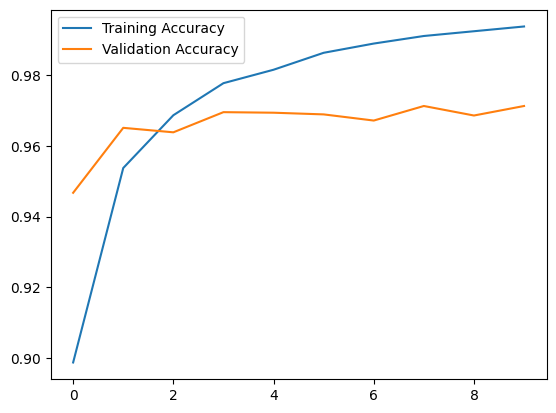

In [31]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


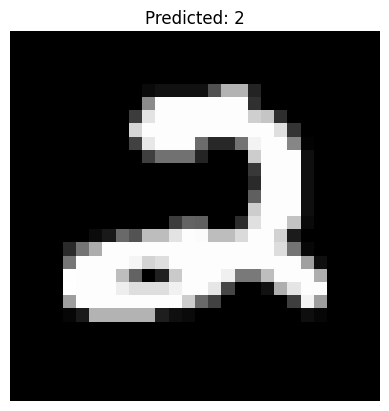

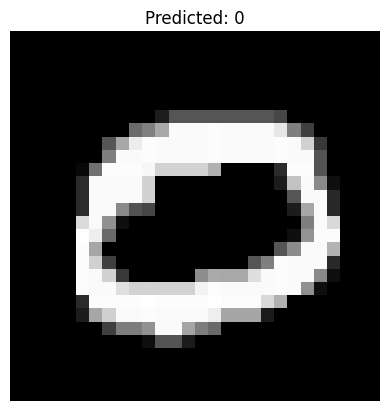

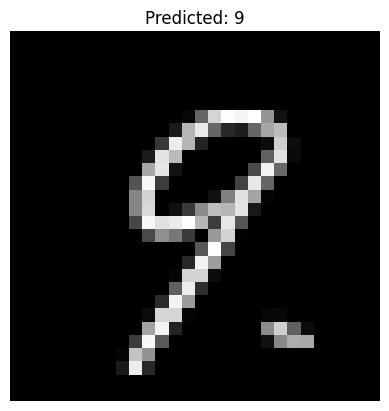

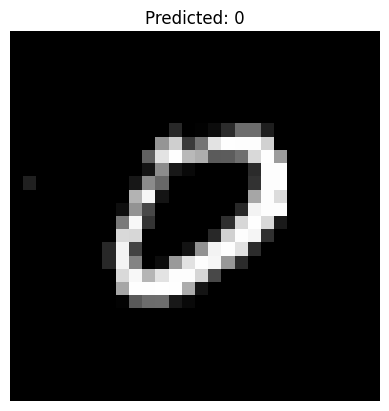

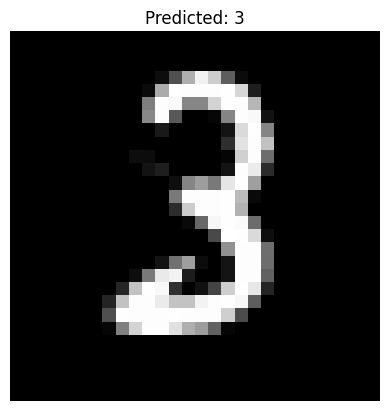

In [32]:
test_data = pd.read_csv('/content/test.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()